In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
boston= load_boston()
print(boston.keys(),'\n')
print(boston.data,'\n')
print(boston.target,'\n')
print(boston.feature_names,'\n')
print(boston.DESCR,'\n')

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) 

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] 

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28

In [3]:
bos=pd.DataFrame(boston.data)
bos.columns=boston.feature_names
label=pd.DataFrame(boston.target,columns=['Price'])
bos_final=bos.join(label['Price'])
bos_final.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
x=boston.data
y=boston.target
y=y.reshape(-1,1)

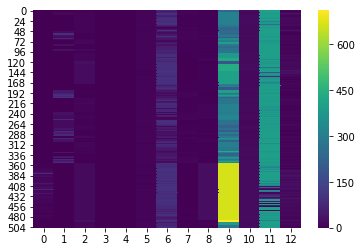

In [5]:
sns.heatmap(x,cmap='viridis')

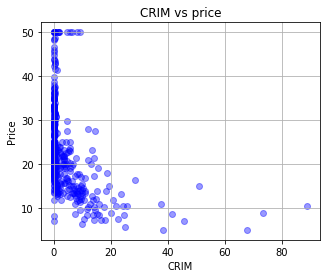

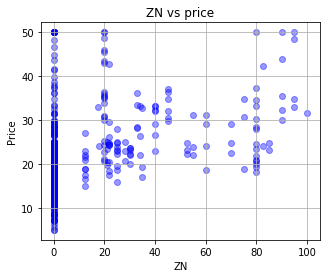

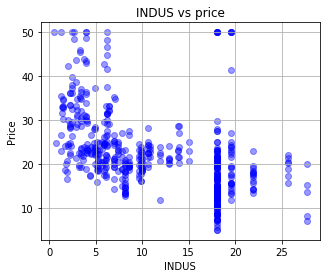

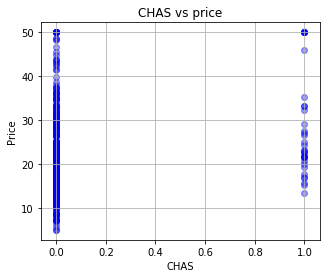

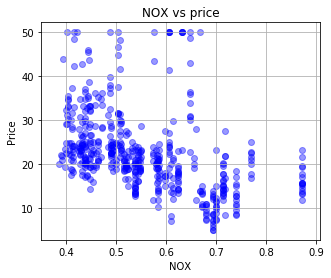

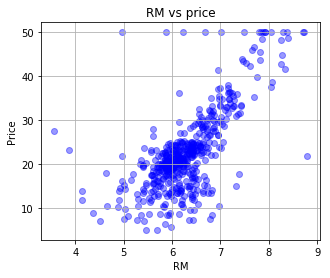

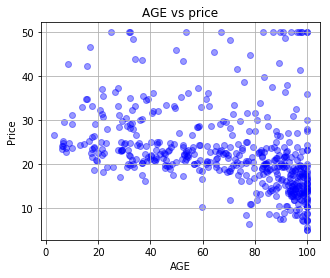

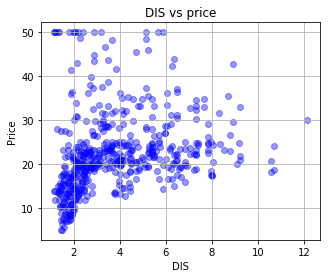

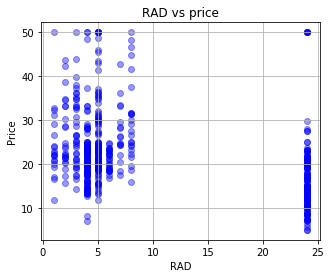

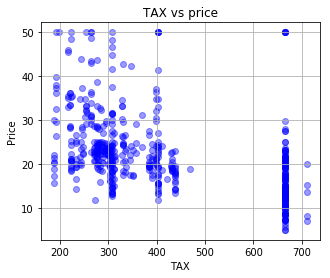

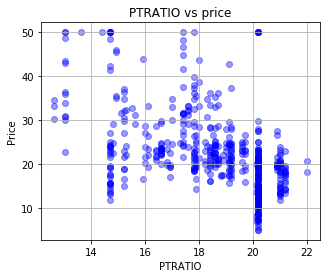

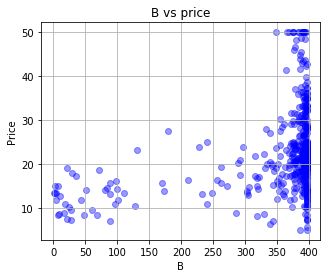

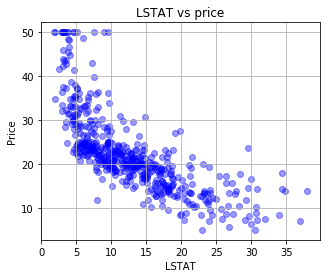

In [6]:
bos=pd.DataFrame(boston.data)
bos.columns=boston.feature_names
cols=boston.feature_names
#cols=['DIS','CRIM','RM']
def plot_scatter(cols):
    for col in cols:
        x_ax=bos[col]
        y_ax=y
        plt.figure(figsize=(5,4))
        plt.scatter(x_ax,y_ax,alpha=0.4,color='b')
        plt.grid()
        plt.title(col+' vs price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()
plot_scatter(cols)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [8]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print('prediction score is',lr.score(x_train,y_train),'\n')
print(lr.coef_,'\n')
pred=lr.predict(x_test)
print('error in predicted price is:',mean_squared_error(y_test,pred))

prediction score is 0.7704941240752379 

[[-1.02245423e-01  3.11044112e-02  1.43693788e-02  1.65964577e+00
  -1.58693910e+01  5.03222436e+00 -7.16365483e-04 -1.31353766e+00
   2.55945159e-01 -1.23369178e-02 -9.03145563e-01  9.65756208e-03
  -4.22793524e-01]] 

error in predicted price is: 33.868033996670285


In [9]:
rid=Ridge()
rid.fit(x_train,y_train)
print('prediction score is',rid.score(x_train,y_train),'\n')
print(rid.coef_,'\n')
pred=rid.predict(x_test)
print('error in predicted price is:',mean_squared_error(y_test,pred))

prediction score is 0.7681620768688792 

[[-9.93355821e-02  3.22384160e-02 -2.38497363e-02  1.46097251e+00
  -8.07996421e+00  5.05868249e+00 -7.71995896e-03 -1.19864754e+00
   2.39452890e-01 -1.27410841e-02 -8.01896981e-01  1.02687786e-02
  -4.33090167e-01]] 

error in predicted price is: 34.320005447451514


In [10]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=400,random_state=50)
rfr.fit(x_train,y_train)
print('prediction score is',rfr.score(x_train,y_train),'\n')
pred=rfr.predict(x_test)
print('error in predicted price is:',mean_squared_error(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


prediction score is 0.9770809610505562 

error in predicted price is: 18.447879951069066


In [11]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print('prediction score is',abr.score(x_train,y_train),'\n')
pred=abr.predict(x_test)
print('error in predicted price is:',mean_squared_error(y_test,pred))


prediction score is 0.910427959436698 

error in predicted price is: 19.60797194586065


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print('prediction score is',svr.score(x_train,y_train))
pred=svr.predict(x_test)
print('error in predicted price is:',mean_squared_error(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


prediction score is 0.7499695384250465
error in predicted price is: 38.22951810169179


In [13]:
# random data for prediction
t=np.array([[.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0908,1.0,296.0,15.3,396.90,4.98]])# entering new data to predict the pric


In [14]:
#saving the best model using pickle
import pickle
file_name=open('final_model.obj','wb')
pickle.dump(rfr,file_name)
file_name.close()

In [15]:
model=pickle.load(open('final_model.obj','rb'))
pred=model.predict(t)
pred


array([24.82025])